# End-to-end Car Price Prediction Using Machine Learning 


Name: Suprasanna V Gunaga
    
Stream: BE Information Science and Engineering, RNSIT Bengaluru (2021-2025).
    


This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting car price based on car attributes.





In [1]:
import pandas as pd
import numpy as np
import xgboost

In [2]:
data=pd.read_csv("CSV files/car datap.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Preprocessing

In [8]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [9]:
import datetime

In [10]:
date_time=datetime.datetime.now()
date_time

datetime.datetime(2023, 11, 25, 19, 43, 3, 551874)

In [11]:
date_year=date_time.year

In [12]:
data["Age"]=date_time.year-data["Year"]
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [13]:
data.drop("Year",axis=1,inplace=True)


In [14]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


# Outlier Removing

In [15]:
import seaborn as sns

<Axes: ylabel='Selling_Price'>

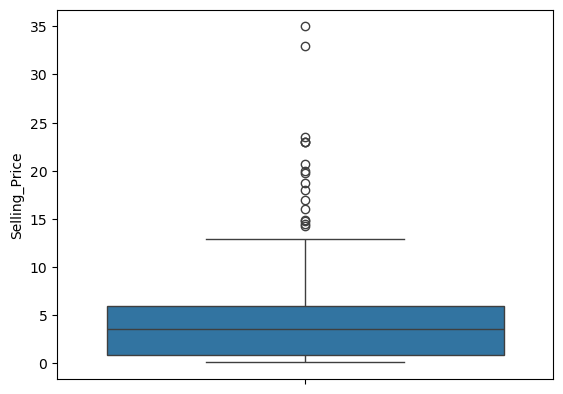

In [16]:
sns.boxplot(data["Selling_Price"])

In [17]:
sorted(data["Selling_Price"],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [18]:
data=data[~(data["Selling_Price"]>=33.0) & (data["Selling_Price"]<=35.0)]

In [19]:
data.shape

(299, 9)

# Converting Object type to Numerical Type

In [20]:
data.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9


In [21]:
data["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [22]:
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
          print(label)
  

Car_Name
Fuel_Type
Seller_Type
Transmission


In [23]:
#This will turn all of the string value into category values
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label]=content.astype("category").cat.as_ordered()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       299 non-null    category
 1   Selling_Price  299 non-null    float64 
 2   Present_Price  299 non-null    float64 
 3   Kms_Driven     299 non-null    int64   
 4   Fuel_Type      299 non-null    category
 5   Seller_Type    299 non-null    category
 6   Transmission   299 non-null    category
 7   Owner          299 non-null    int64   
 8   Age            299 non-null    int64   
dtypes: category(4), float64(2), int64(3)
memory usage: 18.4 KB


In [25]:
pd.Categorical(data["Fuel_Type"]).codes

array([2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2], dtyp

In [26]:
# Turn categorical variables into numbers and missing
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
       data[label+"_is_missing"]=pd.isnull(content)
        # Turn categories into numbers and add +1
       data[label]=pd.Categorical(content).codes+1

In [27]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Car_Name_is_missing,Fuel_Type_is_missing,Seller_Type_is_missing,Transmission_is_missing
0,90,3.35,5.59,27000,3,1,2,0,9,False,False,False,False
1,93,4.75,9.54,43000,2,1,2,0,10,False,False,False,False
2,69,7.25,9.85,6900,3,1,2,0,6,False,False,False,False
3,96,2.85,4.15,5200,3,1,2,0,12,False,False,False,False
4,92,4.60,6.87,42450,2,1,2,0,9,False,False,False,False


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car_Name                 299 non-null    int8   
 1   Selling_Price            299 non-null    float64
 2   Present_Price            299 non-null    float64
 3   Kms_Driven               299 non-null    int64  
 4   Fuel_Type                299 non-null    int8   
 5   Seller_Type              299 non-null    int8   
 6   Transmission             299 non-null    int8   
 7   Owner                    299 non-null    int64  
 8   Age                      299 non-null    int64  
 9   Car_Name_is_missing      299 non-null    bool   
 10  Fuel_Type_is_missing     299 non-null    bool   
 11  Seller_Type_is_missing   299 non-null    bool   
 12  Transmission_is_missing  299 non-null    bool   
dtypes: bool(4), float64(2), int64(3), int8(4)
memory usage: 16.4 KB


In [29]:
X=data.drop(["Car_Name","Selling_Price","Car_Name_is_missing","Fuel_Type_is_missing","Seller_Type_is_missing","Transmission_is_missing"],axis=1)
y=data['Selling_Price']

In [30]:
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,3,1,2,0,9
1,9.54,43000,2,1,2,0,10
2,9.85,6900,3,1,2,0,6
3,4.15,5200,3,1,2,0,12
4,6.87,42450,2,1,2,0,9
...,...,...,...,...,...,...,...
296,11.60,33988,2,1,2,0,7
297,5.90,60000,3,1,2,0,8
298,11.00,87934,3,1,2,0,14
299,12.50,9000,2,1,2,0,6


In [31]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

# Splitting the dataset into Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Importing the models

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Model Training

In [35]:
lr=LinearRegression()
lr.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

xgb=GradientBoostingRegressor()
xgb.fit(X_train,y_train)

xg=XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Prediction on Test Data

In [36]:
y_pred1=lr.predict(X_test)
y_pred2=rf.predict(X_test)
y_pred3=xgb.predict(X_test)
y_pred4=xg.predict(X_test)

# Evaluating The Algorithm

In [37]:
from sklearn import metrics


In [38]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [39]:
print(score1,score2,score3,score4)
print("Max score is",max(score1,score2,score3,score4))

0.67908849831294 0.7268051580994275 0.8957622507544727 0.8887471822279068
Max score is 0.8957622507544727


In [40]:
final_data=pd.DataFrame({"Models":["LR","RF","GBR","XG"],
             "R2_Score":[score1,score2,score3,score4]})
final_data

,Models,R2_Score
0,LR,0.679088
1,RF,0.726805
2,GBR,0.895762
3,XG,0.888747


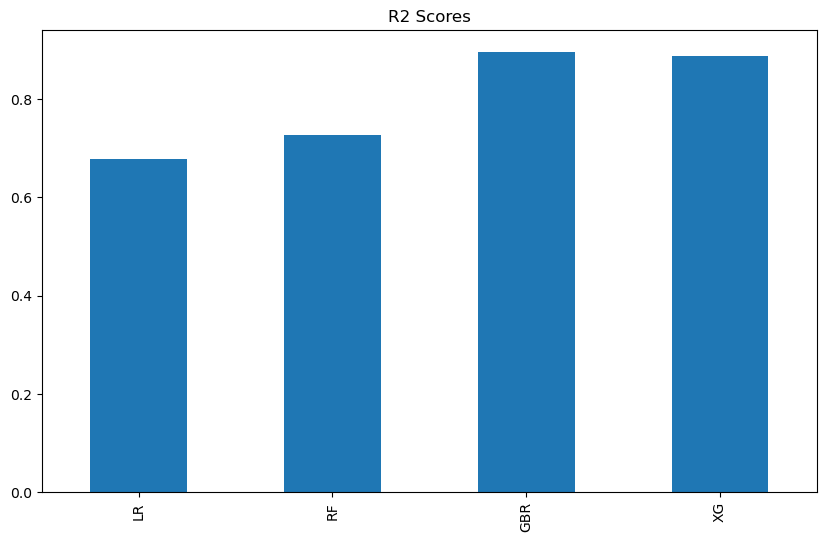

In [49]:
finaldata=pd.DataFrame({"LR":score1,"RF":score2,"GBR":score3,"XG":score4},index=[0])
finaldata.T.plot.bar(title="R2 Scores",figsize=(10,6),legend=False);




# Save the Model

In [ ]:
xg=XGBRegressor()
xg_final=xg.fit(x,y)

In [ ]:
import joblib

In [ ]:
joblib.dump(xg_final,"Car_Price_Predictor")

In [ ]:
model=joblib.load('Car_Price_Predictor')

# Prediction on New Data

In [ ]:
import pandas as pd
data_new = pd.DataFrame({
    'Present_Price':5.59,
    'Kms_Driven':27000,
    'Fuel_Type':0,
    'Seller_Type':0,
    'Transmission':0,
    'Owner':0,
    'Age':8},
     index=[0])

In [ ]:
model.predict(data_new)

In [ ]:
from tkinter import *
import pandas as pd

import joblib
def show_entry_fields():
    

    p1=float(e1.get()) 
    p2=float(e2.get()) 
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    model=joblib.load('Car_Price_Predictor')
    data_new = pd.DataFrame({
    'Present_Price':p1,
    'Kms_Driven':p2,
    'Fule_Type':p3,
    'Seller_Type':p4,
    'Transmission':p5,
    'Owner':p6,
    'Age':p7},
     index=[0])
    result=model.predict(data_new)
    Label(master, text="Car Purchase amount").grid(row=8)
    Label(master, text=result).grid(row=10)
    print("Car Purchase amount", result[0])





master=Tk()

master.title("Car Price Prediction Using Machine Learning")

label=Label(master, text="Car Price Prediction Using Machine Learning",
        bg="black", fg = "white"). \
               grid(row=0,columnspan=2)


Label(master, text="Present_Price").grid(row=1)
Label(master, text="Kms_Driven").grid(row=2)
Label (master, text="Fuel_Type").grid(row=3)
Label(master, text="Seller Type").grid(row=4) 
Label(master, text="Transmission").grid(row=5)
Label(master, text="Owner").grid(row=6)
Label(master, text="Age").grid(row=7) 

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6=  Entry(master)
e7 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()